## `Task 1 :` EDA
Assume that you are working as a Data Scientist with one of the world's 
leading insurance providers (like UnitedHealth Group).  
This is an open ended question. Kindly apply all your knowledge to perform an 
exploratory data analysis on the given dataset. It is known that the target variable 
is Charges. 
However, you are mandatorily supposed to solve the below mentioned EDA Task 
for your presentation: 
1. Explore the data distribution of each column. 
2. Identify some important patterns i.e. Which variables are most significant 
with respect to the target variable? 
3. Insights and Recommendations (i.e. Data Driven Business Decision) 
Write proper conclusions and provide recommendations to the telecom company 
based on the insights.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("insurance.csv")

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.shape

(1338, 7)

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- Observation : not having any null value

In [16]:
data.duplicated().sum()

1

In [18]:
data.drop_duplicates(inplace =True)

In [20]:
data.shape

(1337, 7)

In [22]:
numerical_data = data.select_dtypes(include = [int,float]).columns.tolist()


In [24]:
numerical_data

['age', 'bmi', 'children', 'charges']

In [26]:
categorical_data = data.select_dtypes(include =["object"]).columns.tolist()

In [28]:
categorical_data

['sex', 'smoker', 'region']

## Distribution of data

age            Axes(0.125,0.786098;0.227941x0.0939024)
bmi         Axes(0.398529,0.786098;0.227941x0.0939024)
children    Axes(0.672059,0.786098;0.227941x0.0939024)
charges        Axes(0.125,0.673415;0.227941x0.0939024)
dtype: object

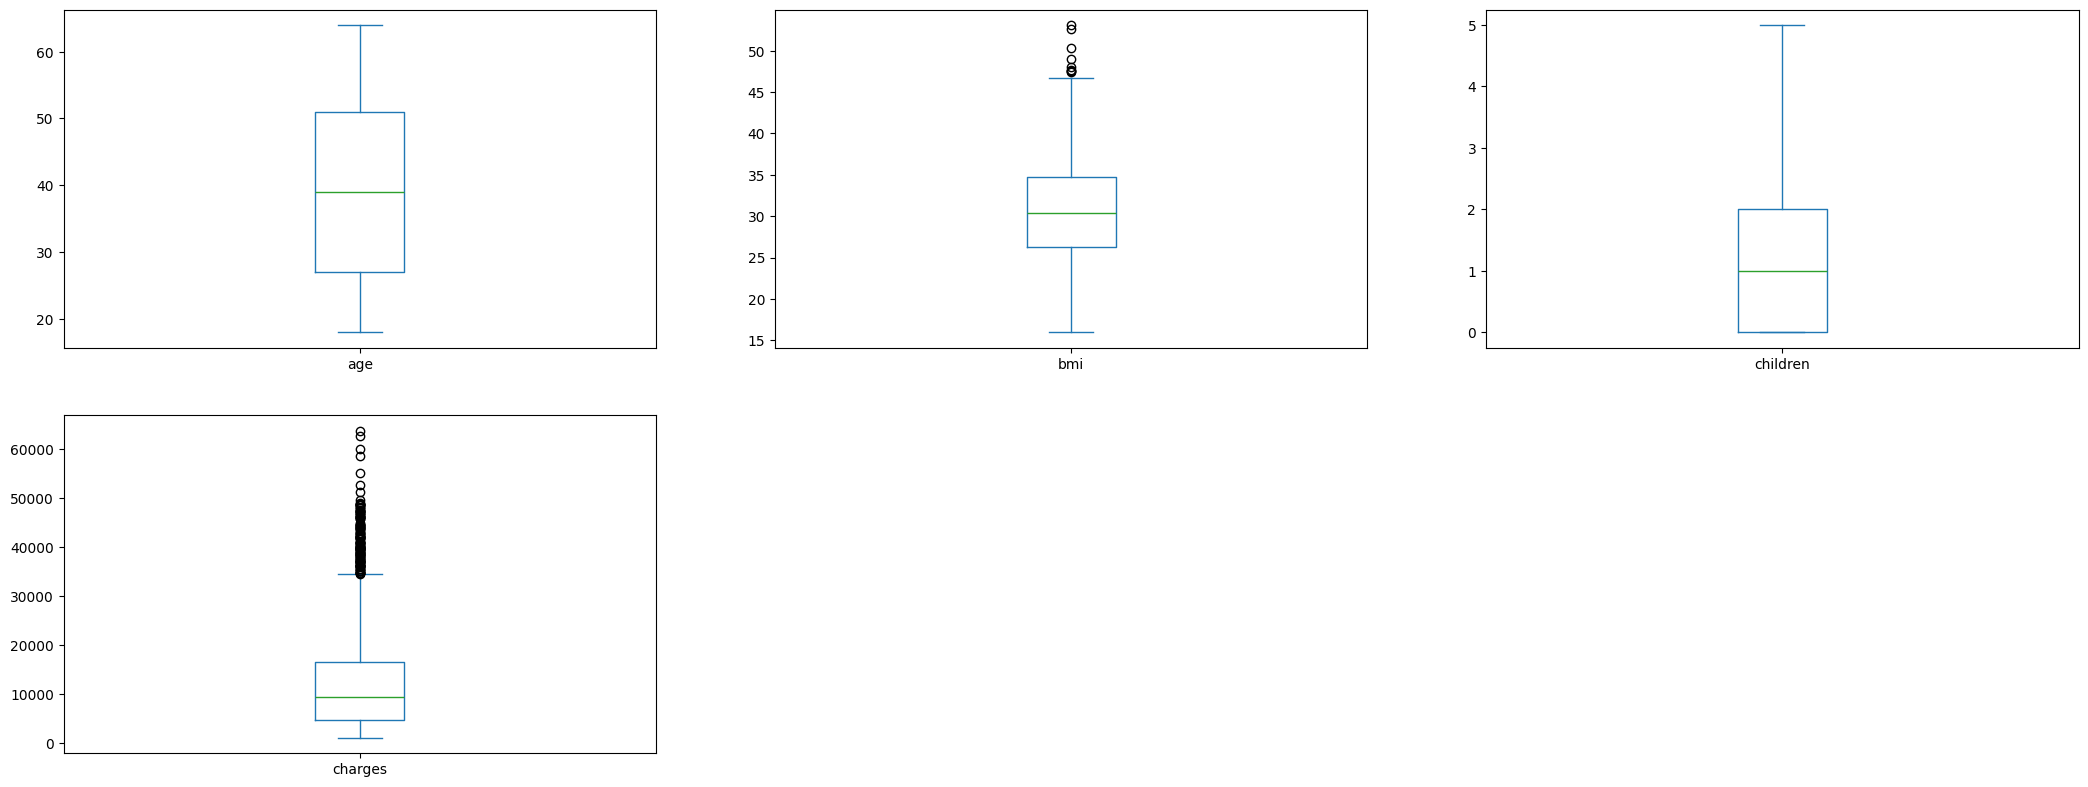

In [31]:
data[numerical_data].plot(kind ='box' , subplots =True ,figsize =(26,36),layout =(7,3) )

`Observation:` "Charges" is our target variable and has highly skewed values to make it normally distributed(Make it less skewed), so in that case, we will use the log function (log transformation).

- In health insurance, most people pay small bills, but a few people have very high medical bills.

- These high bills are called catastrophic claims (like surgery, cancer treatment, ICU stay).

- For an insurance company, these cases are the most important to predict, because they cost the most money.

`Note:`
- so we keep the high charges (outliers)

- But transform or use robust models so that they don’t “break” your model.

In [33]:
data.bmi.unique().max()

53.13

In [36]:
data.bmi.unique().min()

15.96

`Observation :` In our dataset `BMI` column having range  `15.96 - 53.13`.

- Lower BMI (too low):

    - Below 18.5 → Underweight

    - Body may be too thin, possible health risks.

- Normal BMI (healthy range):

    - 18.5 – 24.9 → Normal

    - Balanced weight for height.

- Higher BMI (too high):

    - 25 – 29.9 → Overweight

    - Extra weight, higher risk of health issues.

- Obese (much higher BMI):

    - 30 – 34.9 → Obesity (Class 1, moderate)

    - 35 – 39.9 → Obesity (Class 2, severe)

    - 40 or more → Obesity (Class 3, very severe/extreme)
 
`Note:` if BMI >=40, so we don't remove them because these are valid cases (morbid obesity) Very important for insurance prediction, because such customers usually have higher medical charges.


## Univariate Analysis

####  Univariate Analysis on numerical data

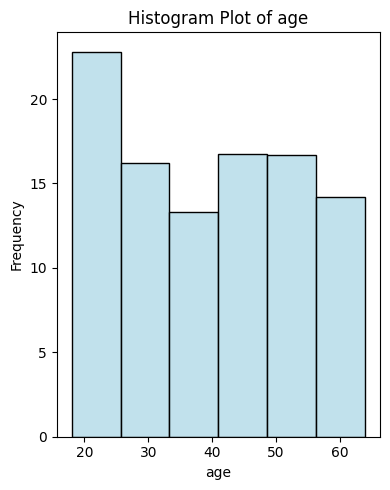

In [41]:
plt.figure(figsize =(4,5))
sns.histplot(data = data["age"] , bins =6, color ="lightblue" ,stat ="percent")
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of age')
plt.tight_layout()


`Observation:` those who are aged between 20-33, and 40-55 are people who buy health insurance more.

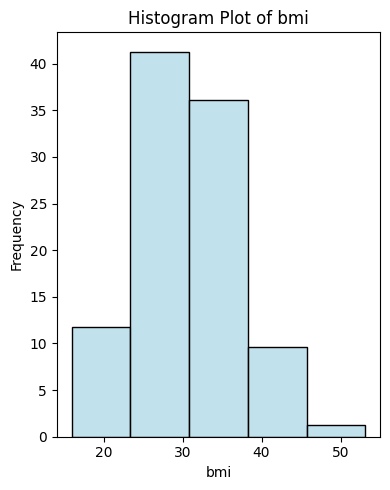

In [53]:
plt.figure(figsize =(4,5))
sns.histplot(data =  data["bmi"] , bins =5, color ="lightblue" ,stat ="percent")
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of bmi')
plt.tight_layout()

`Observation:` Most of the customers' BMI is between 25-39 range

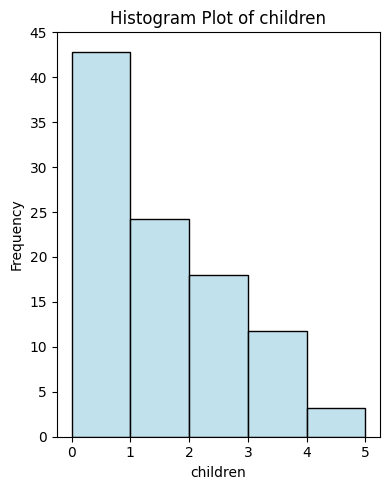

In [55]:
plt.figure(figsize =(4,5))
sns.histplot(data = data["children"] , bins =5, color ="lightblue" ,stat ="percent")
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of children')
plt.tight_layout()

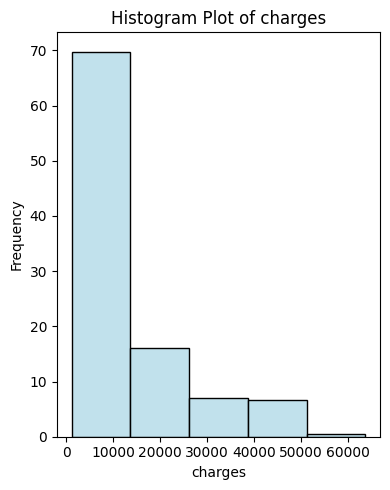

In [57]:
plt.figure(figsize =(4,5))
sns.histplot(data =  data["charges"] , bins =5, color ="lightblue" ,stat ="percent")
plt.ylabel('Frequency')
plt.title(f'Histogram Plot of charges')
plt.tight_layout()

#### Univariate Analysis on categorical data

In [59]:
def plot_pie_chart(df,column):
    df[column].value_counts().plot.pie(
    autopct="%1.1f%%", 
    colors=sns.color_palette("Blues"))
    plt.title(f"Pie Chart For {column}")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Categories")
    plt.tight_layout()

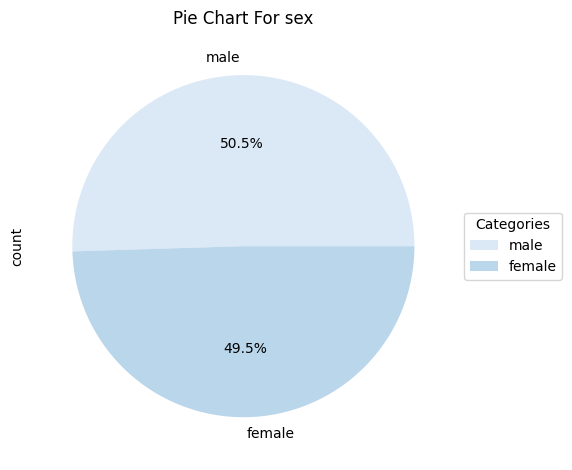

In [61]:
plot_pie_chart(data,"sex")

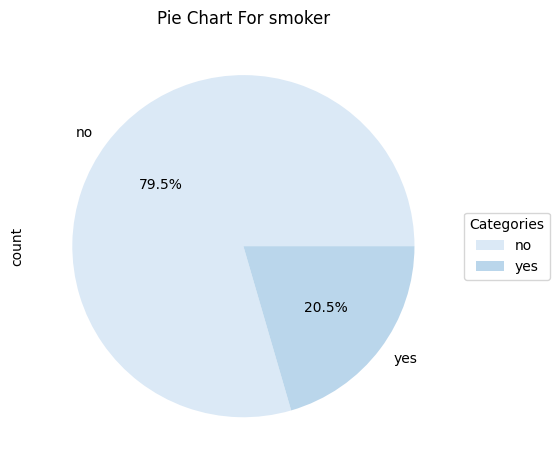

In [63]:
plot_pie_chart(data,"smoker")

`Observation:`
- Here we compare smokers Vs non-smokers: so most of the customers are non-smokers

In [67]:
data['smoker'] = data['smoker'].map({'no':0, 'yes':1})

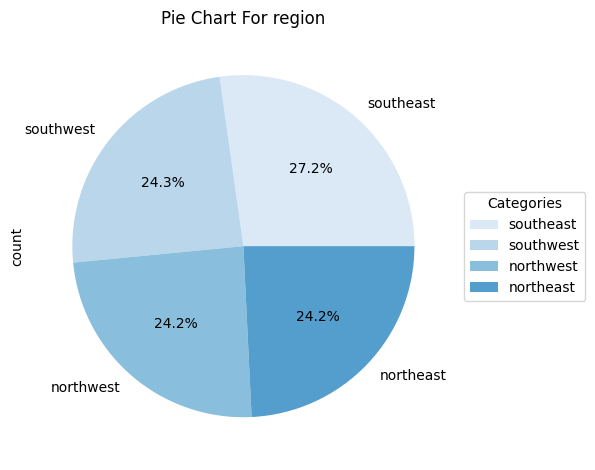

In [69]:
plot_pie_chart(data,"region")

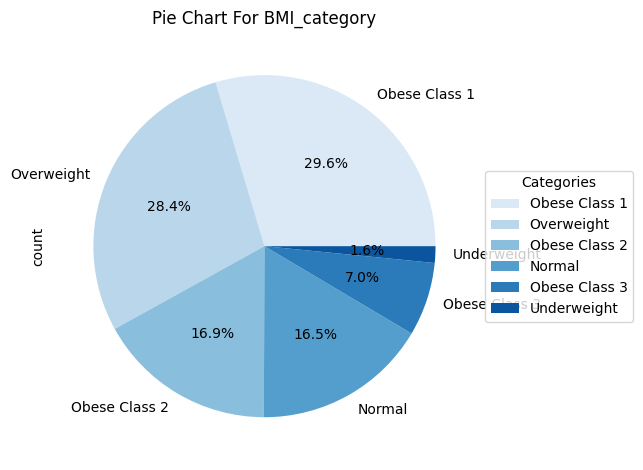

In [81]:
plot_pie_chart(data,"BMI_category")

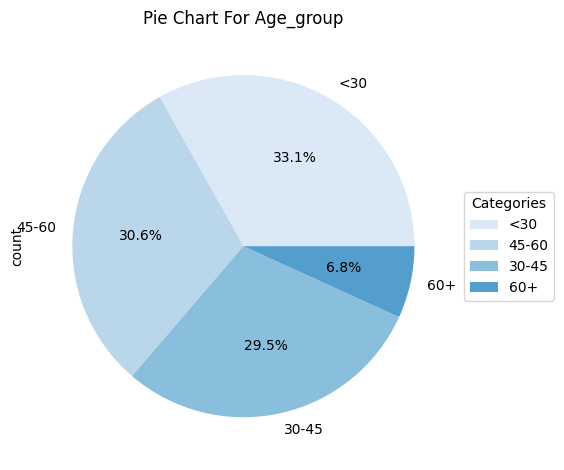

In [83]:
plot_pie_chart(data,"Age_group")

### Bivariate Analysis

#### numerical vs numerical-----------------> scatter plot on 1st priority
#### numerical vs categorical ---------------> bar plot, stacked bar chart, box plot on 1st priority 
#### categorical vs categorical -------------> grouped bar chart , stacked bar chart ,heat map on 1st priority

### numerical VS numerical

`Observation:` 
- Most customers have a BMI between 20 and 40 across all ages
- A few customers are underweight(<18.5) or extremely obses(>45), they are rare cases.
- BMI doesn't show a strong relationship with age (no clear increasing and decreasing trend)

<Axes: xlabel='age', ylabel='bmi'>

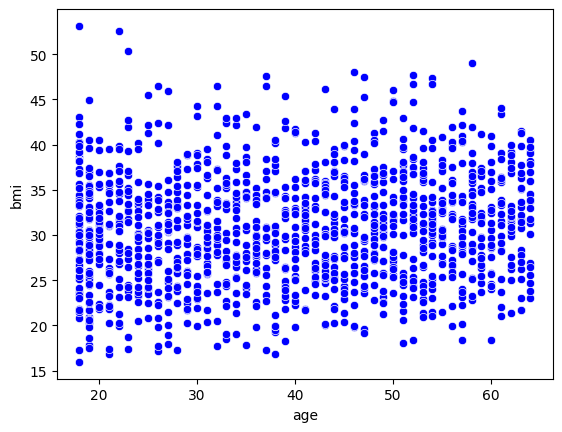

In [85]:
#after removing outliers from BMI
sns.scatterplot(x ="age" ,y ="bmi" ,data =data , color ="blue")

`Observation`: 
- Age and BMI don't have any strong correlation. 
- Both Features are independent

<Axes: xlabel='age', ylabel='charges'>

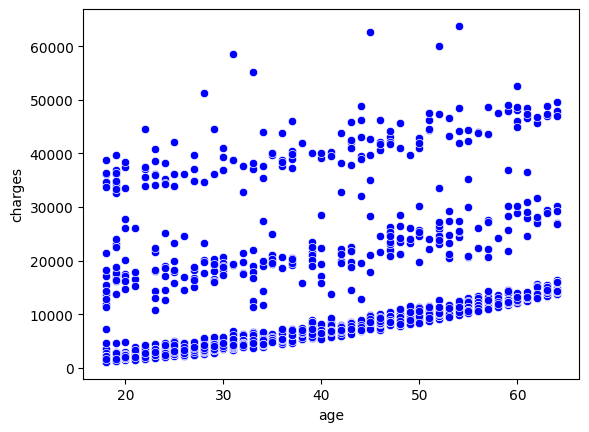

In [87]:
sns.scatterplot(x ="age" ,y="charges",data =data ,color ="blue")

`Observation:`
- Younger people usually have lower medical expenses, but costs rise sharply for older ages.
- This is useful for early savings and health planning

<Axes: xlabel='bmi', ylabel='charges'>

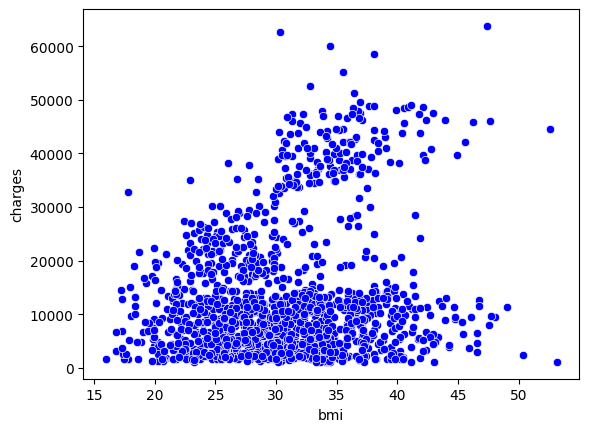

In [89]:
sns.scatterplot(x ="bmi" ,y="charges",data =data ,color ="blue")

# `Observation:`
- BMI Range between 15 and 45
- More than (BMI 18.5–24.9). Higher BMI often means higher charges (risk of diabetes, heart disease, etc.)
- BMi and charges almost don't have any correlation.
- BMI alone doesn’t explain medical costs well.

<Axes: xlabel='smoker', ylabel='charges'>

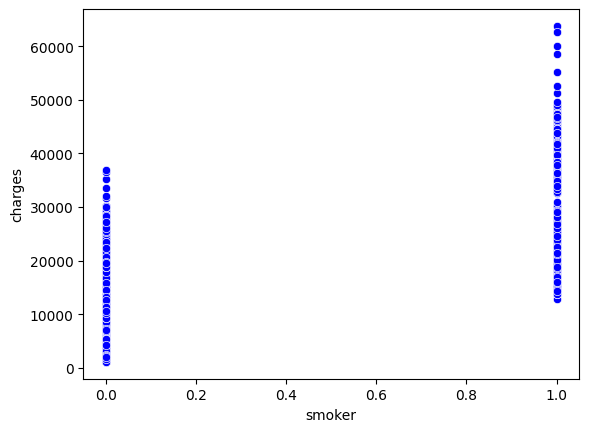

In [91]:
sns.scatterplot(x ="smoker" ,y="charges",data =data,color ="blue")

`Observation:`Usually, smokers pay 3–4x more in medical bills.
Useful for anti-smoking campaigns and showing people the financial impact of smoking.

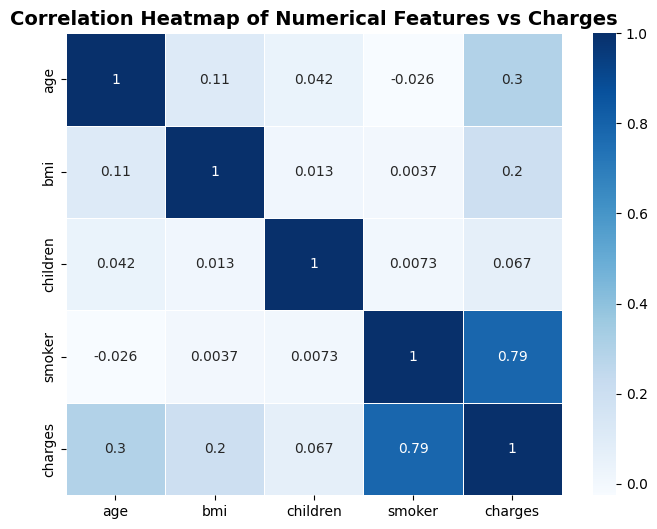

In [93]:
plt.figure(figsize=(8,6))
corr = data[['age','bmi','children','smoker','charges']].corr()

sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Numerical Features vs Charges", fontsize=14, fontweight="bold")
plt.show()

`Observation:` 
- Smoker (0.60 with charges) : Strongest correlation with medical charges and Smoking status is the most important predictor of higher insurance costs.
- Age (0.45 with charges) : Moderate positive correlation, As age increases, charges tend to rise (older people = higher health risks).
- BMI (-0.06 with charges): Negligible correlation in this dataset, BMI alone does not determine charges, but it may interact with other factors (e.g., smoker + high BMI).
- No Multicollinearity Issue : Correlations among independent variables (age, bmi, children, smoker) are weak.
and Each variable contributes unique information to the model.

### numerical vs categorical

In [97]:
def analyze_num_vs_cat(df, num_col, cat_col):
    results = {}

    # 1. Descriptive statistics per category
    group_stats = df.groupby(cat_col)[num_col].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
    results['group_stats'] = group_stats

    # 2. Difference between groups (max mean - min mean)
    diff = group_stats['mean'].max() - group_stats['mean'].min()
    results['mean_difference'] = round(diff, 2)

    # 3. Visualization (Blue Theme)
    sns.set_style("whitegrid")
    palette = sns.color_palette("Blues", len(df[cat_col].unique()))

    plt.figure(figsize=(16,11))

    # Boxplot
    plt.subplot(2,2,1)
    sns.boxplot(x=cat_col, y=num_col, data=df, palette=palette)
    plt.title(f'Boxplot of {num_col} by {cat_col}', fontsize=12, weight="bold", color="navy")
    plt.xticks(rotation=20)

    # Violinplot
    plt.subplot(2,2,2)
    sns.violinplot(x=cat_col, y=num_col, data=df, palette=palette)
    plt.title(f'Violinplot of {num_col} by {cat_col}', fontsize=12, weight="bold", color="navy")
    plt.xticks(rotation=20)

    # Barplot (mean comparison)
    plt.subplot(2,2,3)
    sns.barplot(x=cat_col, y=num_col, data=df, ci=None, palette=palette)
    plt.title(f'Average {num_col} by {cat_col}', fontsize=12, weight="bold", color="navy")
    plt.xticks(rotation=20)

    plt.tight_layout()
    plt.show()

    return results



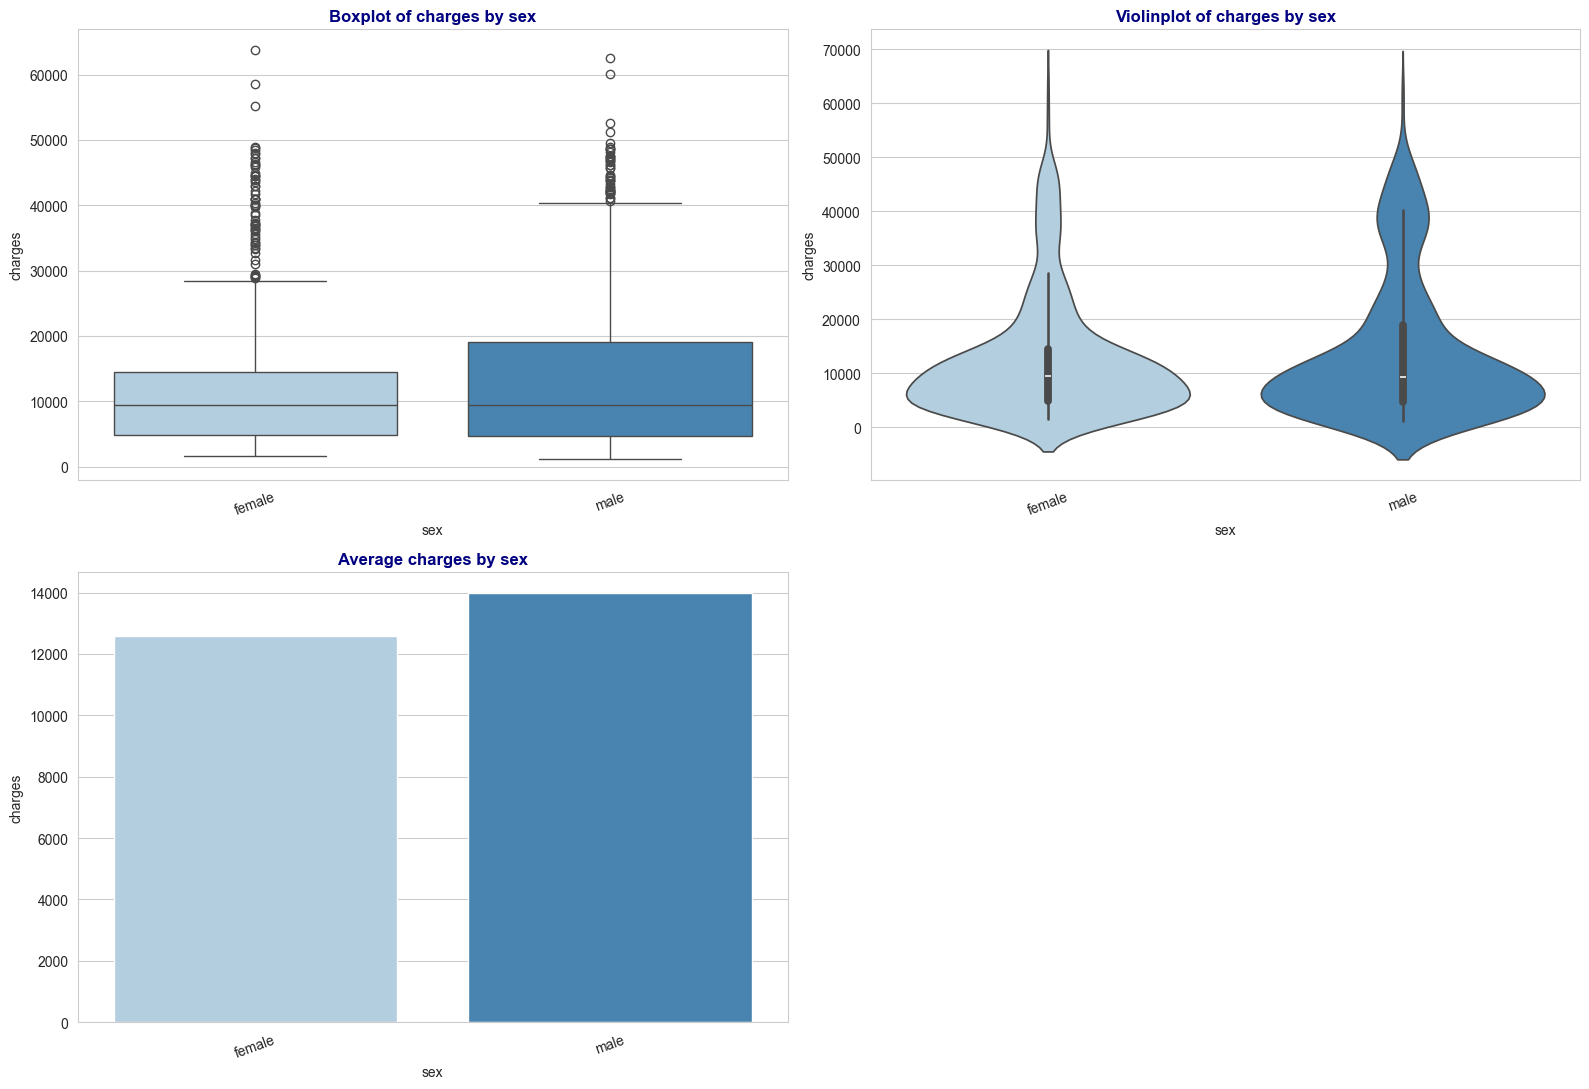

Group Statistics:
         count      mean   median       std      min       max
sex                                                          
female    662  12569.58  9412.96  11128.70  1607.51  63770.43
male      675  13975.00  9377.90  12971.96  1121.87  62592.87
Mean difference between groups: 1405.42


In [99]:
results = analyze_num_vs_cat(data, "charges", "sex")
print("Group Statistics:\n", results['group_stats'])
print("Mean difference between groups:", results['mean_difference'])

`Observation:` 
- So we see that females have higher medical costs than males.
- insight: the females need more awareness about lifestyle diseases.

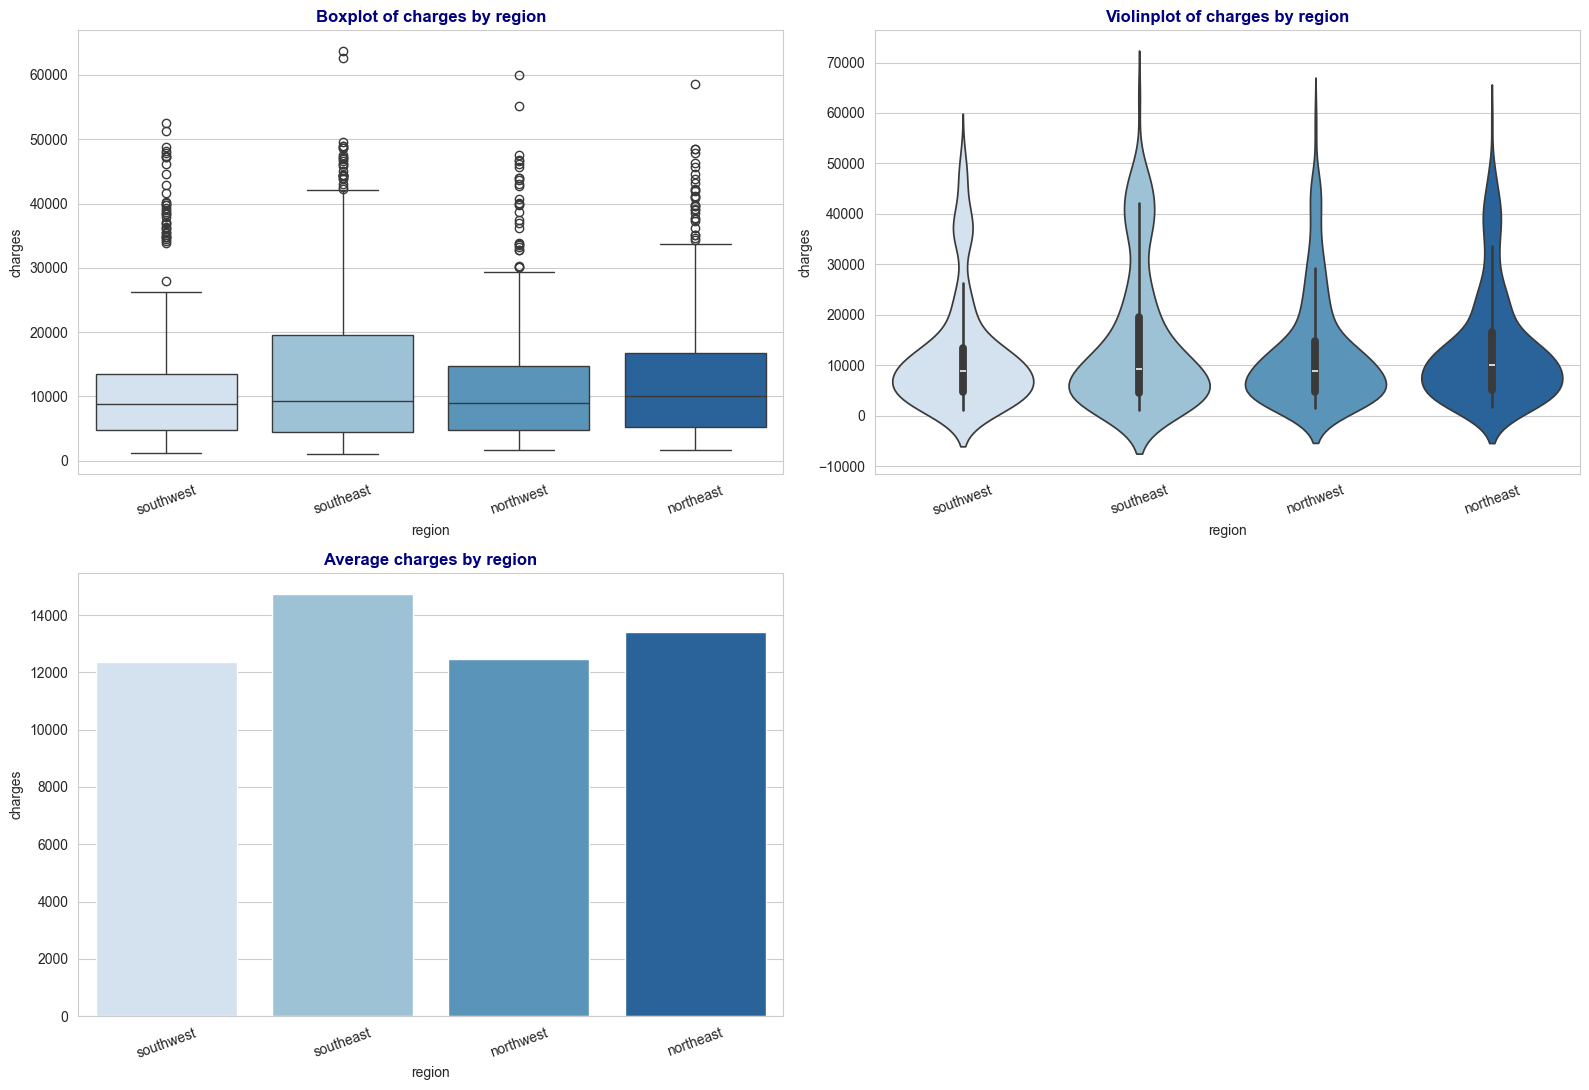

Group Statistics:
            count      mean    median       std      min       max
region                                                           
northeast    324  13406.38  10057.65  11255.80  1694.80  58571.07
northwest    324  12450.84   8976.98  11073.13  1621.34  60021.40
southeast    364  14735.41   9294.13  13971.10  1121.87  63770.43
southwest    325  12346.94   8798.59  11557.18  1241.56  52590.83
Mean difference between groups: 2388.47


In [101]:
results = analyze_num_vs_cat(data, "charges", "region")
print("Group Statistics:\n", results['group_stats'])
print("Mean difference between groups:", results['mean_difference'])

`Observation:`
- Northeast region customers pay more charges than other regions.
- Helps local communities understand which areas face higher health risks or costs.
- Southeast region shows highest average charges, possibly due to lifestyle & diet patterns.

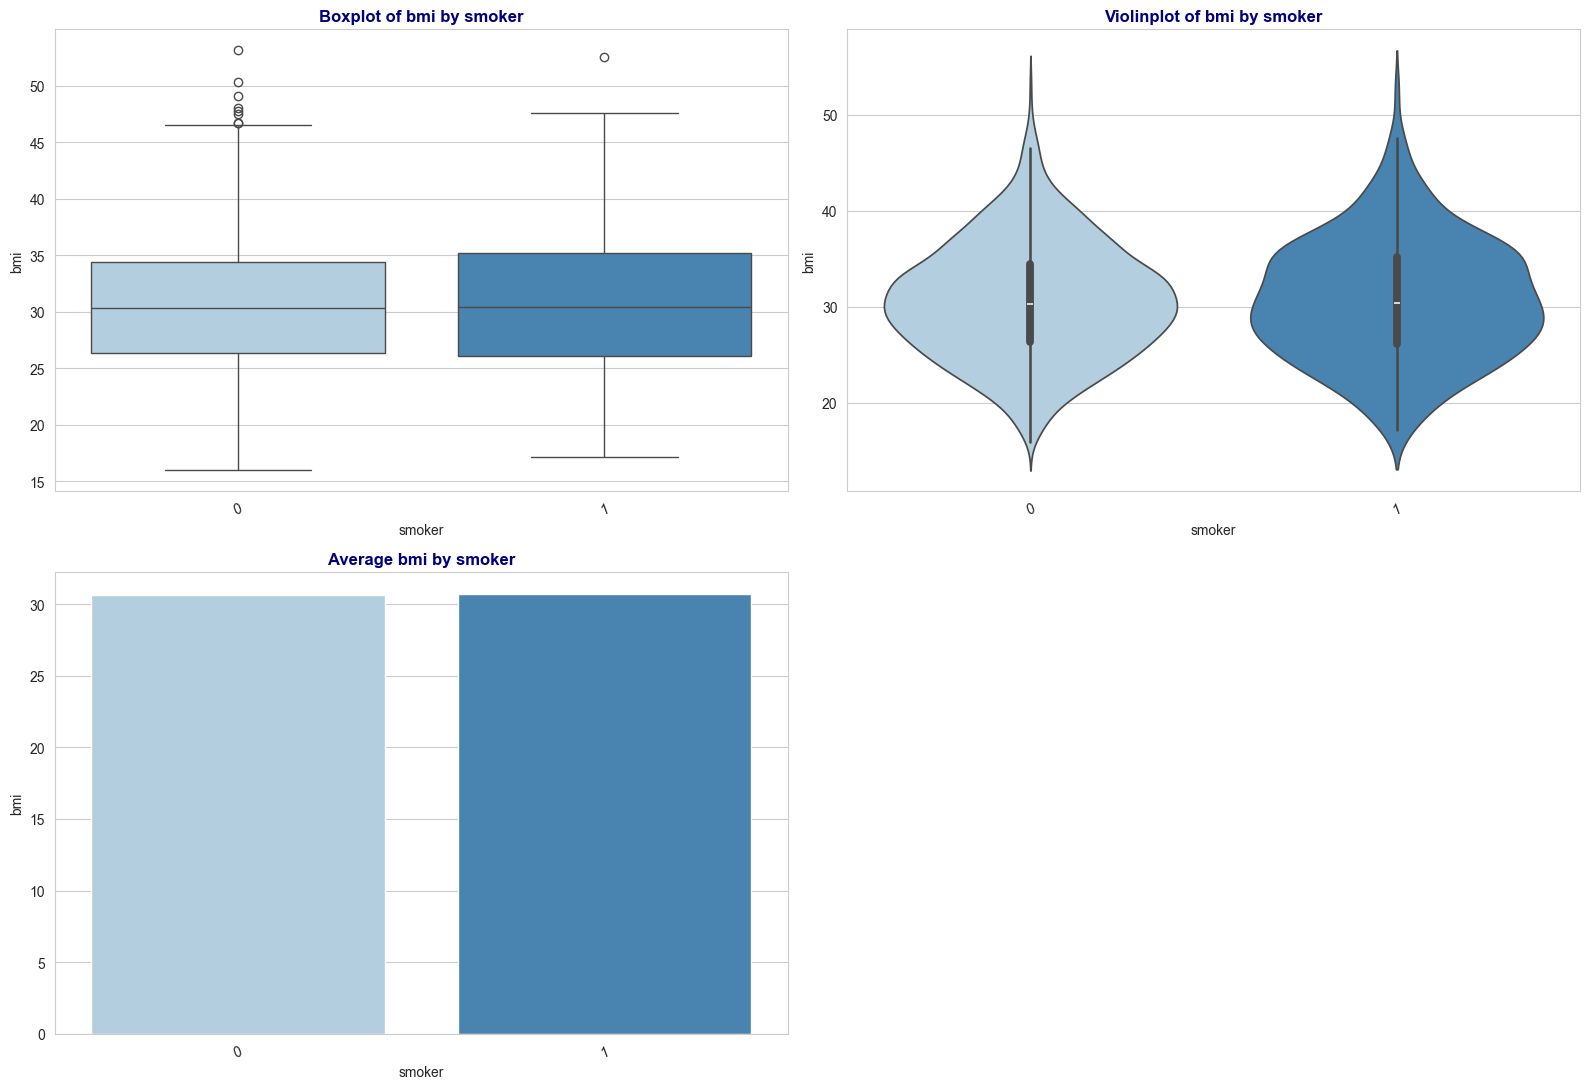

Group Statistics:
         count   mean  median   std    min    max
smoker                                          
0        1063  30.65   30.30  6.05  15.96  53.13
1         274  30.71   30.45  6.32  17.20  52.58
Mean difference between groups: 0.06


In [103]:
results = analyze_num_vs_cat(data, "bmi", "smoker")
print("Group Statistics:\n", results['group_stats'])
print("Mean difference between groups:", results['mean_difference'])

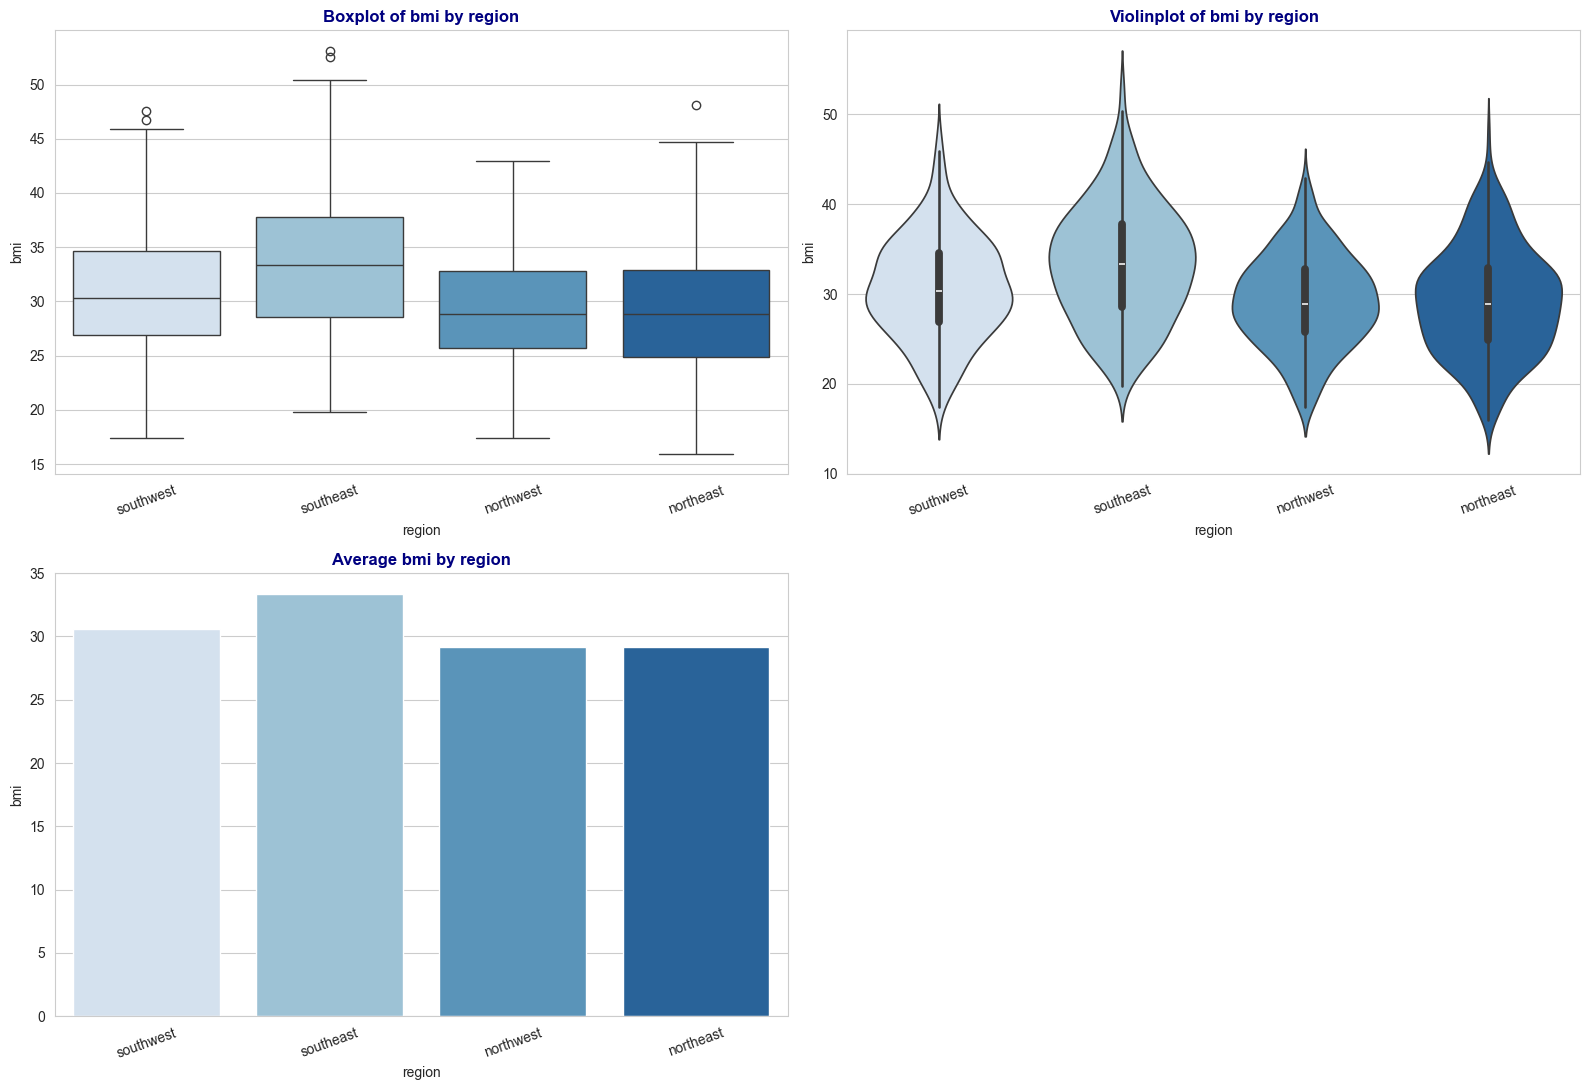

Group Statistics:
            count   mean  median   std    min    max
region                                             
northeast    324  29.17   28.88  5.94  15.96  48.07
northwest    324  29.20   28.88  5.14  17.39  42.94
southeast    364  33.36   33.33  6.48  19.80  53.13
southwest    325  30.60   30.30  5.69  17.40  47.60
Mean difference between groups: 4.19


In [105]:
results = analyze_num_vs_cat(data, "bmi", "region")
print("Group Statistics:\n", results['group_stats'])
print("Mean difference between groups:", results['mean_difference'])

`Derived Features Analysis`

In [399]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1190 non-null   int64   
 1   sex           1190 non-null   object  
 2   bmi           1190 non-null   float64 
 3   children      1190 non-null   int64   
 4   smoker        1190 non-null   int64   
 5   region        1190 non-null   object  
 6   charges       1190 non-null   float64 
 7   BMI_category  1190 non-null   category
 8   Age_group     1190 non-null   category
dtypes: category(2), float64(2), int64(3), object(2)
memory usage: 67.9+ KB


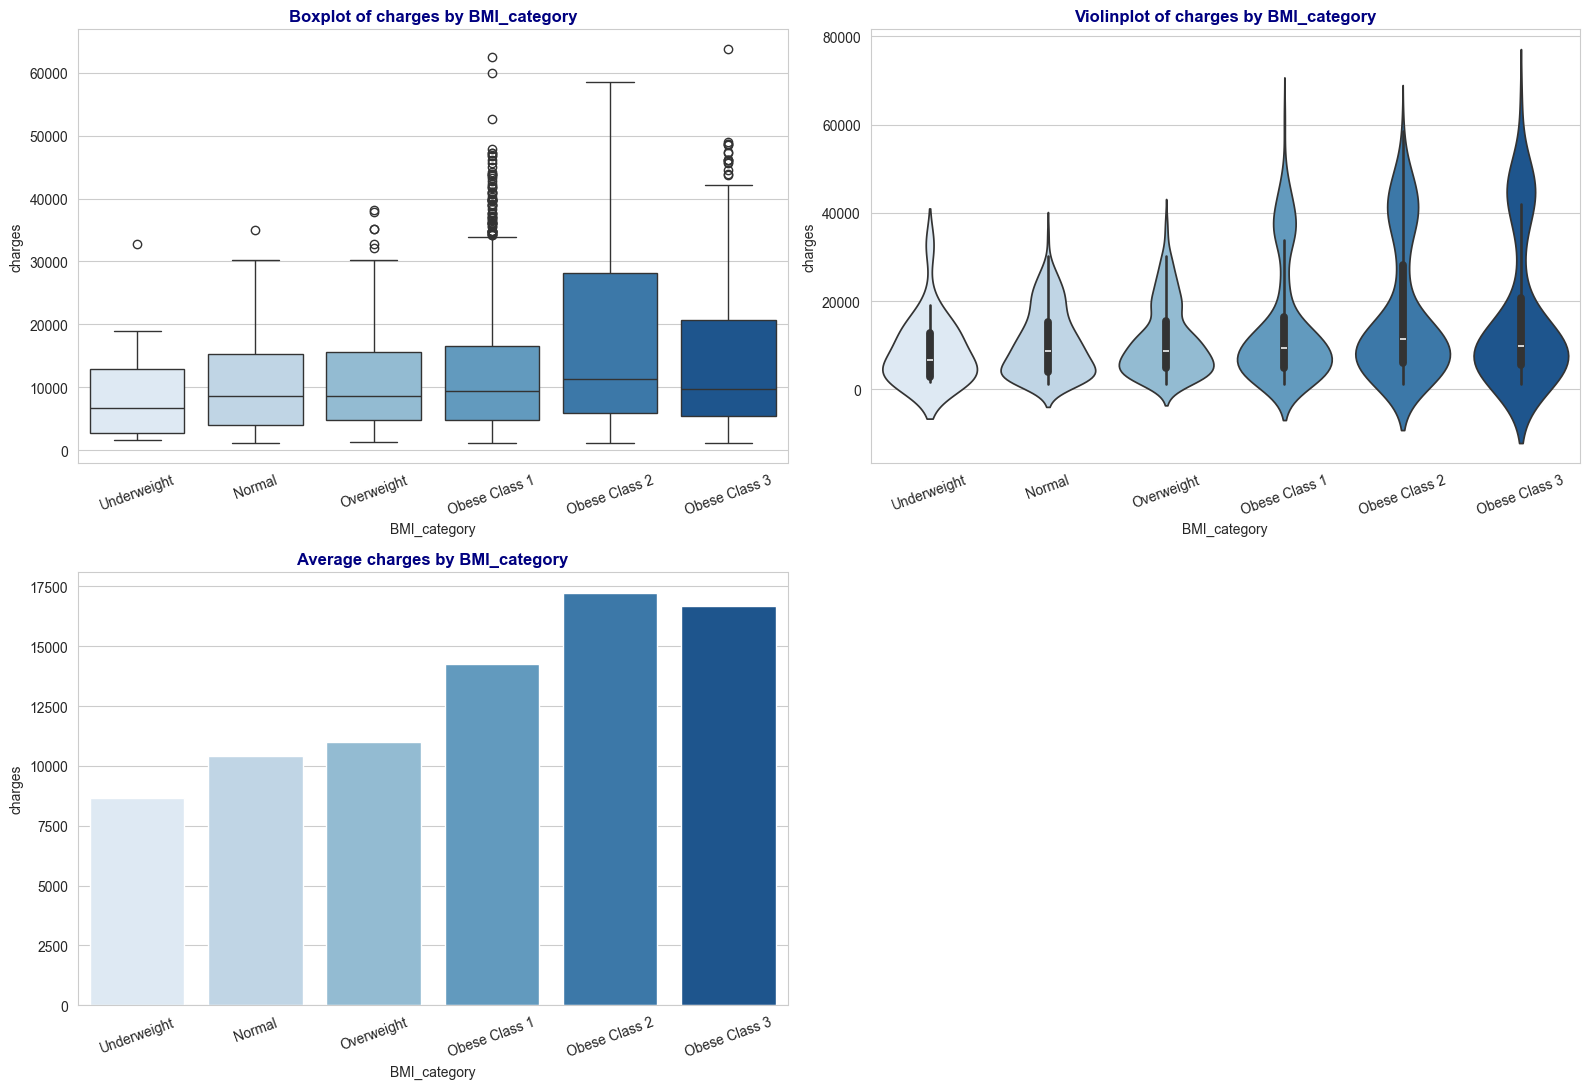

Group Statistics:
                count      mean    median       std      min       max
BMI_category                                                         
Underweight       21   8657.62   6640.54   7591.73  1621.34  32734.19
Normal           221  10404.90   8604.48   7508.17  1121.87  35069.37
Overweight       380  11006.81   8659.38   8004.18  1252.41  38245.59
Obese Class 1    396  14249.38   9412.96  13393.52  1131.51  62592.87
Obese Class 2    226  17245.41  11313.65  15344.21  1141.45  58571.07
Obese Class 3     93  16667.61   9748.91  16497.00  1146.80  63770.43
Mean difference between groups: 8587.79


In [107]:
results = analyze_num_vs_cat(data, "charges", "BMI_category")
print("Group Statistics:\n", results['group_stats'])
print("Mean difference between groups:", results['mean_difference'])

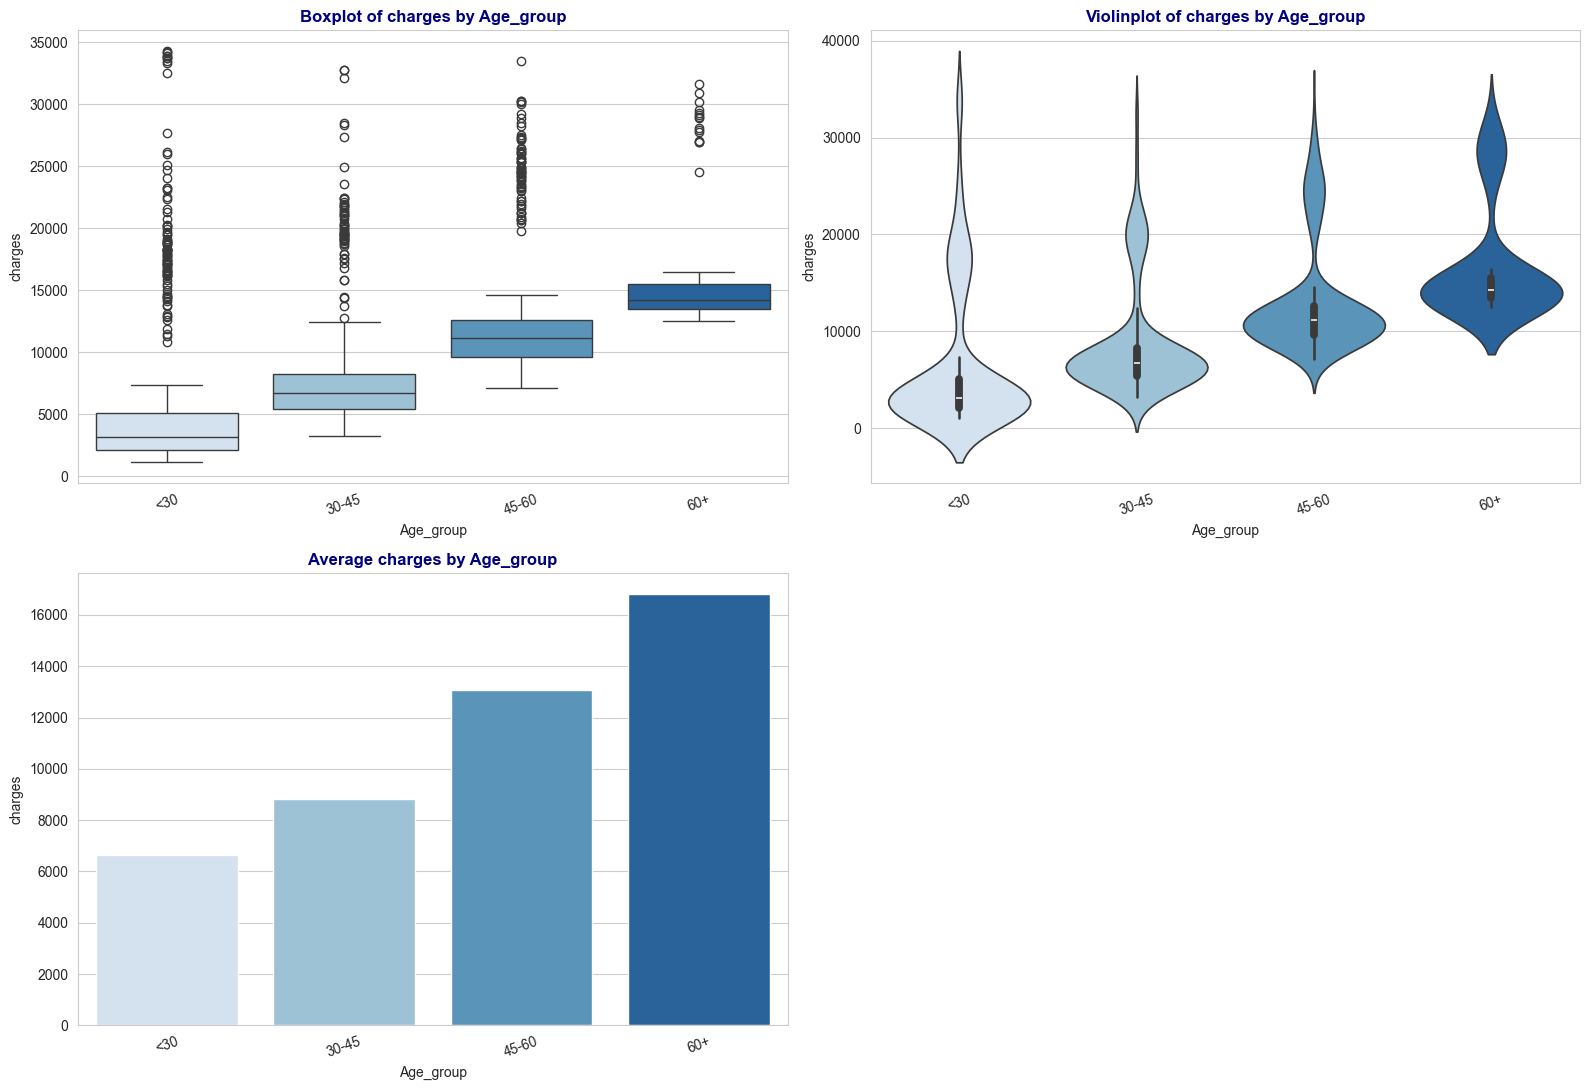

Group Statistics:
            count      mean    median      std       min       max
Age_group                                                        
<30          401   6636.60   3176.82  7660.78   1121.87  34303.17
30-45        348   8822.95   6750.81  5793.51   3260.20  32787.46
45-60        363  13081.44  11165.42  5655.24   7147.10  33471.97
60+           78  16799.33  14222.80  5860.56  12557.61  31620.00
Mean difference between groups: 10162.73


In [362]:
results = analyze_num_vs_cat(data_cleaned, "charges", "Age_group")
print("Group Statistics:\n", results['group_stats'])

print("Mean difference between groups:", results['mean_difference'])

In [75]:
##Create BMI categories
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class 1', 'Obese Class 2', 'Obese Class 3']
data['BMI_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

In [79]:
## Create Age groups
age_bins = [0, 30, 45, 60, 100]
age_labels = ['<30', '30-45', '45-60', '60+']
data['Age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)


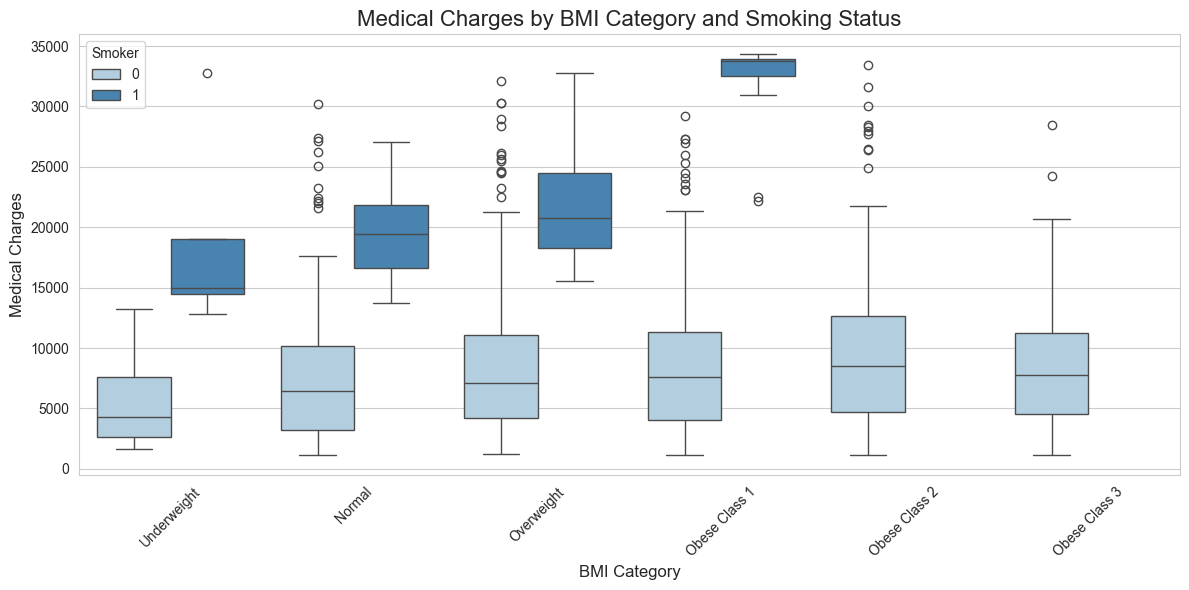

In [360]:
# Set blue theme
sns.set_style("whitegrid")
palette = "Blues"  # Blue color theme

# Create grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='BMI_category', y='charges', hue='smoker', data=data_cleaned, palette=palette)
plt.title('Medical Charges by BMI Category and Smoking Status', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Medical Charges', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Smoker', loc='upper left')
plt.tight_layout()
plt.show()

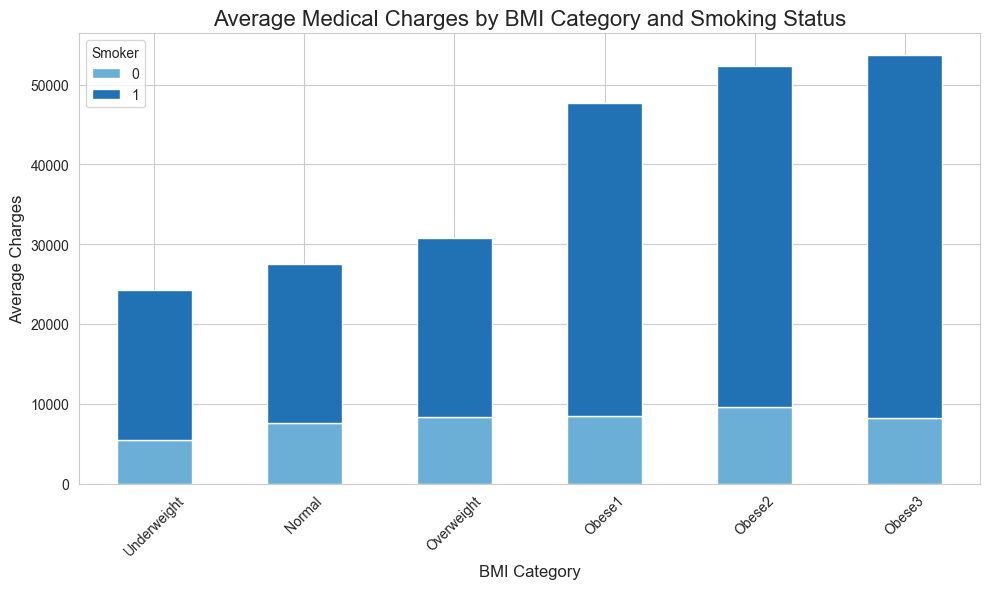

In [116]:
# Create BMI categories
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese1', 'Obese2', 'Obese3']
data['BMI_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

# Optional: Age groups
age_bins = [0, 30, 45, 60, 100]
age_labels = ['<30', '30-45', '45-60', '60+']
data['Age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Aggregate average charges by BMI and smoker
agg_data = data.groupby(['BMI_category', 'smoker'])['charges'].mean().unstack()

# Plot stacked bar chart
agg_data.plot(kind='bar', stacked=True, color=['#6baed6','#2171b5'], figsize=(10,6))
plt.title('Average Medical Charges by BMI Category and Smoking Status', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

`Observation:` Medical charges increase with higher BMI and smoking status, highlighting that obese smokers face the highest healthcare costs.

In [322]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   object 
 2   bmi       1190 non-null   float64
 3   children  1190 non-null   int64  
 4   smoker    1190 non-null   int64  
 5   region    1190 non-null   object 
 6   charges   1190 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 65.2+ KB


### categorical vs categorica

In [118]:

def analyze_cat_vs_cat(df, cat_col1, cat_col2):
    results = {}

    # Crosstab
    crosstab_counts = pd.crosstab(df[cat_col1], df[cat_col2])
    crosstab_percent = pd.crosstab(df[cat_col1], df[cat_col2], normalize="index") * 100
    results['crosstab_counts'] = crosstab_counts
    results['crosstab_percent'] = crosstab_percent.round(2)

    # Visualization
    sns.set_style("whitegrid")
    plt.figure(figsize=(14,6))  # Balanced size

    # Heatmap (percentages)
    plt.subplot(1,2,1)
    sns.heatmap(crosstab_percent, annot=True, fmt=".1f", cmap="Blues")
    plt.title(f'Heatmap of {cat_col1} vs {cat_col2} (%)', fontsize=12, weight="bold", color="navy")

    # Stacked barplot (counts)
    plt.subplot(1,2,2)
    crosstab_counts.plot(kind="bar", stacked=True, colormap="Blues", ax=plt.gca())
    plt.title(f'Stacked Barplot: {cat_col1} vs {cat_col2}', fontsize=12, weight="bold", color="navy")
    plt.xticks(rotation=20)

    plt.tight_layout()
    plt.show()

    return results



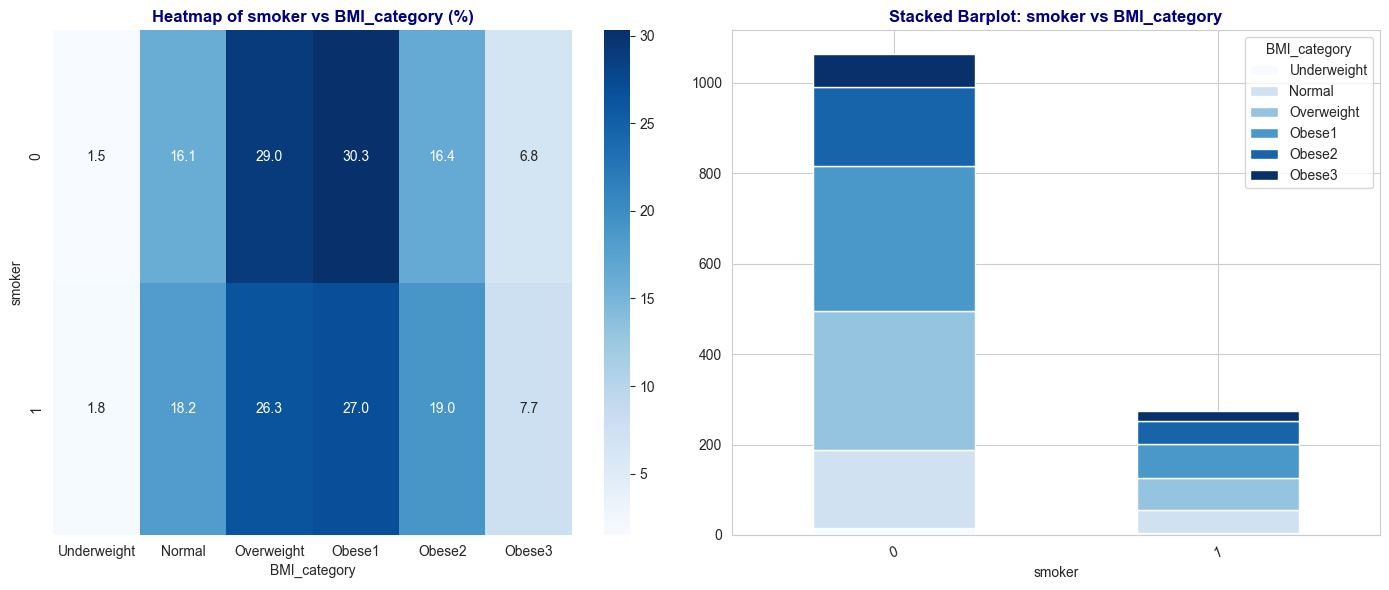

Crosstab (Counts):
 BMI_category  Underweight  Normal  Overweight  Obese1  Obese2  Obese3
smoker                                                               
0                      16     171         308     322     174      72
1                       5      50          72      74      52      21
Crosstab (Percentages):
 BMI_category  Underweight  Normal  Overweight  Obese1  Obese2  Obese3
smoker                                                               
0                    1.51   16.09       28.97   30.29   16.37    6.77
1                    1.82   18.25       26.28   27.01   18.98    7.66


In [120]:
results = analyze_cat_vs_cat(data, "smoker", "BMI_category")
print("Crosstab (Counts):\n", results['crosstab_counts'])
print("Crosstab (Percentages):\n", results['crosstab_percent'])


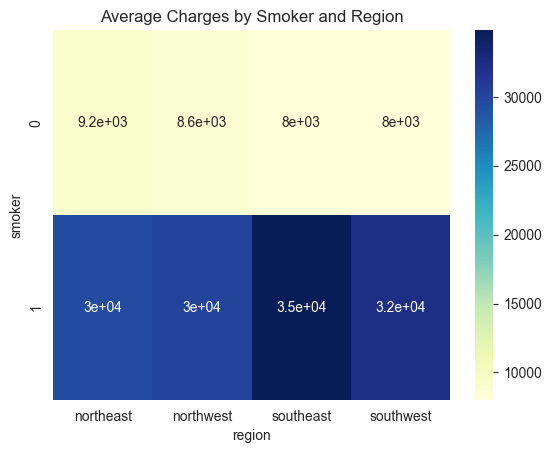

In [122]:
pivot_table = data.pivot_table(values="charges", index="smoker", columns="region", aggfunc="mean")

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Average Charges by Smoker and Region")
plt.show()


## multivariate analysis

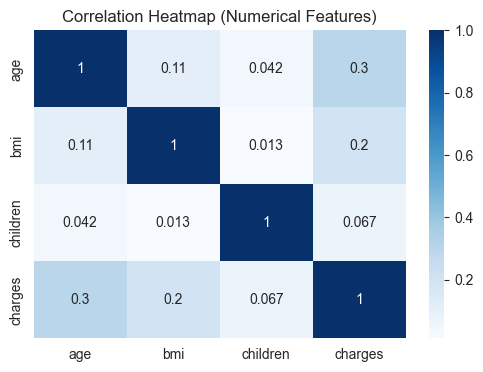

In [124]:
# Select only numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Correlation matrix
corr = data[num_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


#### Smoker × Gender effect

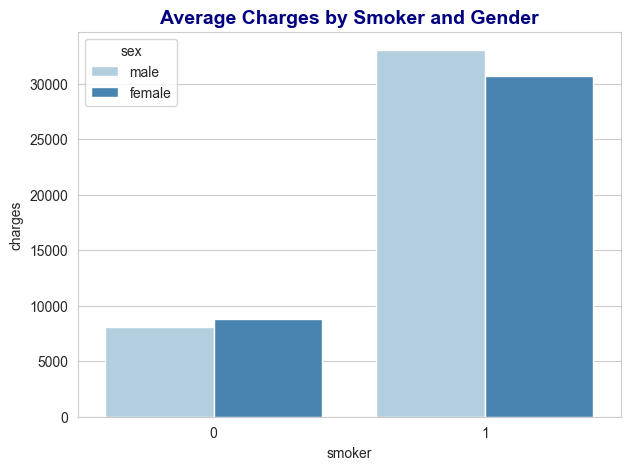

In [126]:
plt.figure(figsize=(7,5))
sns.barplot(x="smoker", y="charges", hue="sex", data= data, ci=None, palette="Blues")
plt.title("Average Charges by Smoker and Gender", fontsize=14, fontweight="bold", color="navy")
plt.show()

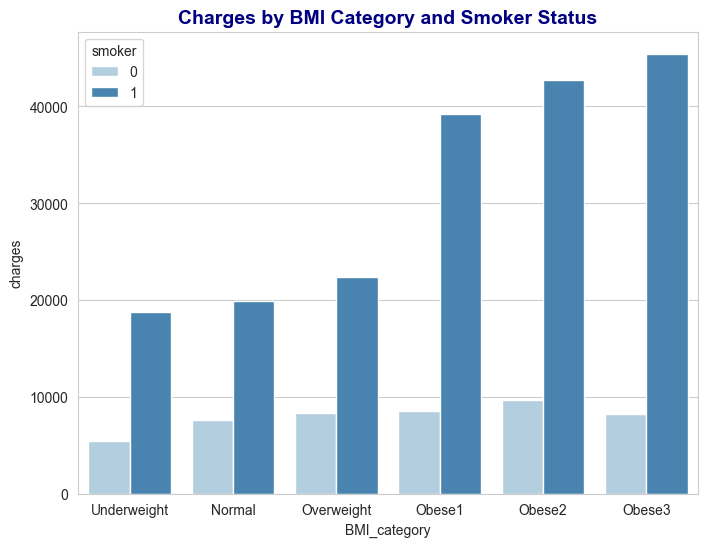

In [128]:
plt.figure(figsize=(8,6))
sns.barplot(x="BMI_category", y="charges", hue="smoker", data= data, ci=None, palette="Blues")
plt.title("Charges by BMI Category and Smoker Status", fontsize=14, fontweight="bold", color="navy")
plt.show()

### BMI × Smoker interaction

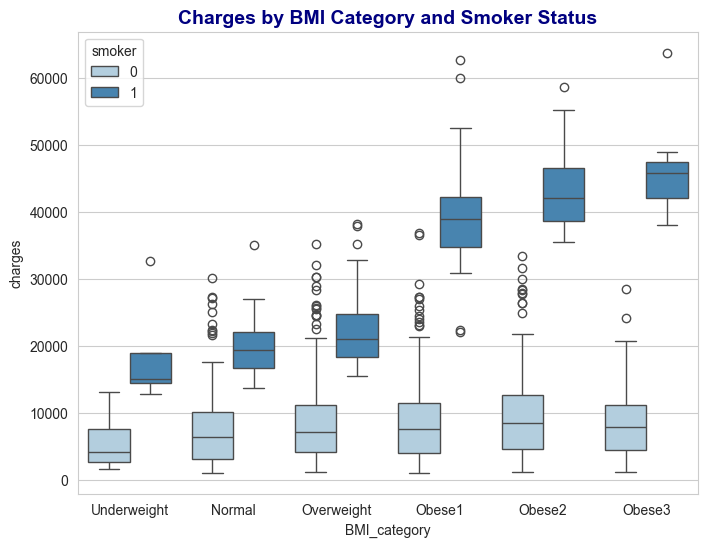

In [130]:
plt.figure(figsize=(8,6))
sns.boxplot(x="BMI_category", y="charges", hue="smoker", data=data, palette="Blues")
plt.title("Charges by BMI Category and Smoker Status", fontsize=14, fontweight="bold", color="navy")
plt.show()

### Smoker × Region combined impact

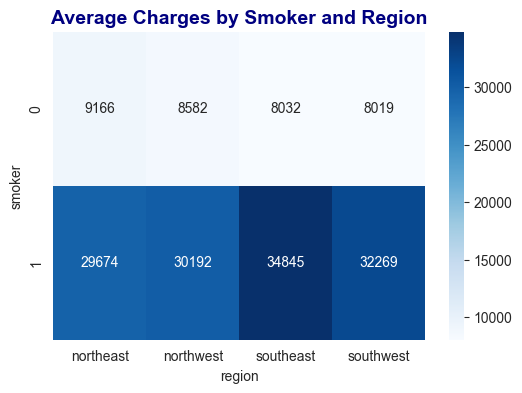

In [132]:
pivot_table = data.pivot_table(values="charges", index="smoker", columns="region", aggfunc="mean")

plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".0f")
plt.title("Average Charges by Smoker and Region", fontsize=14, fontweight="bold", color="navy")
plt.show()

In [134]:
data["Age_group"].unique()

['<30', '30-45', '45-60', '60+']
Categories (4, object): ['<30' < '30-45' < '45-60' < '60+']

In [136]:
data["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

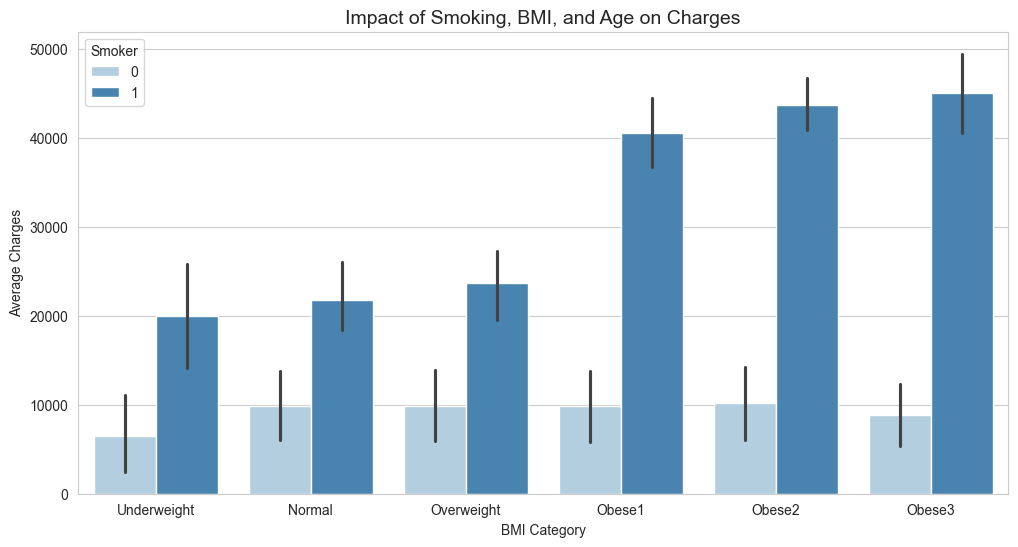

In [140]:
grouped = data.groupby(['smoker', 'BMI_category', 'Age_group'])['charges'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, 
            x='BMI_category', 
            y='charges', 
            hue='smoker', 
            palette='Blues')

plt.title("Impact of Smoking, BMI, and Age on Charges", fontsize=14)
plt.ylabel("Average Charges")
plt.xlabel("BMI Category")
plt.legend(title="Smoker")
plt.show()

In [ ]:
#THANK YOU